## **Define Problem**

Problem Statement
Heart disease remains one of the leading causes of death worldwide. Early detection can significantly improve patient outcomes, but diagnosis often requires multiple medical tests and professional evaluation, which can be time-consuming and prone to human error.

The goal of this project is to build a predictive model that can determine whether a patient is likely to have heart disease based on specific medical attributes such as age, blood pressure, cholesterol level, heart rate, and more.

Type of Machine Learning Problem
This is a binary classification problem, where the target variable indicates:

1 → Patient has heart disease

0 → Patient does not have heart disease

Proposed Solution

Dataset: Use the Heart Disease UCI Dataset as the primary data source.

Exploratory Data Analysis (EDA): Understand feature distributions, correlations, and patterns in the data.

Data Preprocessing: Handle missing values, encode categorical features, normalize/scale numerical features if necessary.

Model Selection: Train and compare multiple classification algorithms (e.g., Logistic Regression, Random Forest, XGBoost).

Model Evaluation: Use metrics such as Accuracy, Precision, Recall, and F1-score to assess model performance.

Deployment: Create a user-friendly interface (e.g., with Streamlit) to allow real-time predictions from user input.

Deliverable
A deployed machine learning model capable of predicting heart disease risk based on user-provided medical data, accessible via a simple web interface.

## **Data Collection**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.svm import SVR, LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
#import pandas as pd
#column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
#df = pd.read_csv("/kaggle/input/heart-disease-uci-dataset/processed.cleveland.data",names=column_names )
#df.head()


In [3]:
!pip install ucimlrepo
#  Import the function to fetch the dataset
from ucimlrepo import fetch_ucirepo
import pandas as pd
#  Fetch the Heart Disease dataset (ID = 45)
heart_disease = fetch_ucirepo(id=45)



In [4]:
# Separate features (X) and target (y)
X = heart_disease.data.features
y = heart_disease.data.targets

In [5]:
#  Display first 5 rows to check if data loaded correctly
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [6]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [7]:
#  DataFrame all 
df = pd.concat([X, y], axis=1)
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [8]:
#  Display dataset metadata
print(heart_disease.metadata)

#  Display variable descriptions
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

## **Data Representation**

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [10]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [11]:
y.head()

,num
0,0
1,2
2,1
3,0
4,0


In [12]:
df.sample(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
183,59,1,1,178,270,0,2,145,0,4.2,3,0.0,7.0,0
58,54,1,3,125,273,0,2,152,0,0.5,3,1.0,3.0,0
73,65,1,4,110,248,0,2,158,0,0.6,1,2.0,6.0,1
82,39,1,3,140,321,0,2,182,0,0.0,1,0.0,3.0,0
196,69,1,1,160,234,1,2,131,0,0.1,2,1.0,3.0,0
115,41,1,2,135,203,0,0,132,0,0.0,2,0.0,6.0,0
280,57,1,4,110,335,0,0,143,1,3.0,2,1.0,7.0,2
63,54,0,3,135,304,1,0,170,0,0.0,1,0.0,3.0,0
144,58,1,3,105,240,0,2,154,1,0.6,2,0.0,7.0,0
55,54,1,4,124,266,0,2,109,1,2.2,2,1.0,7.0,1


In [13]:
# 1) Check dataset basic info
print("Dataset Info:")
print(X.info())
print("\nTarget Info:")
print(y.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None

Target Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)

## **Data Wrangling**

In [14]:
# Check for duplicated values
df.duplicated().sum()

0

In [15]:
# 2) Check for missing values
print("\nMissing values in features:")
print(X.isnull().sum())

print("\nMissing values in target:")
print(y.isnull().sum())



Missing values in features:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Missing values in target:
num    0
dtype: int64


## ****Dara Analysis****

In [16]:
# 3) Show basic statistics
print("\nBasic statistics of features:")
print(X.describe())



Basic statistics of features:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241

In [17]:
print("\nBasic statistics of target:")
print(y.describe())


Basic statistics of target:
              num
count  303.000000
mean     0.937294
std      1.228536
min      0.000000
25%      0.000000
50%      0.000000
75%      2.000000
max      4.000000


In [18]:
# 4) Check target value counts
print("\nTarget value counts:")
print(y.value_counts())


Target value counts:
num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64


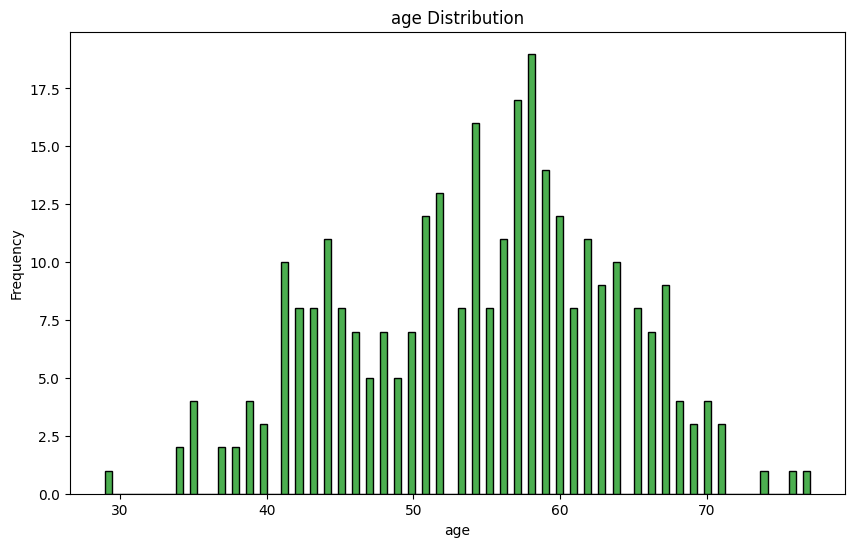

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=100, color='#4CAF50', edgecolor='black')
plt.title('age Distribution')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

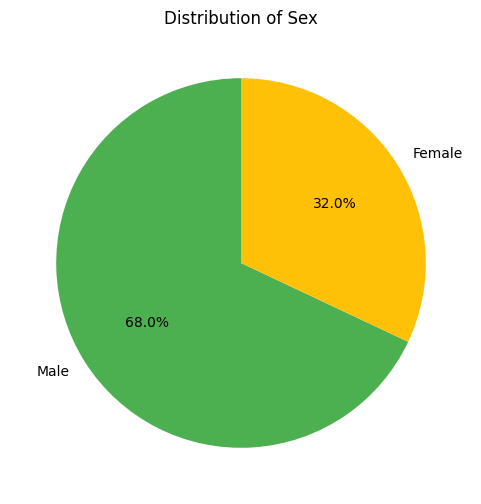

In [20]:
# نفترض البيانات في DataFrame اسمه df
sex_counts = df['sex'].value_counts()
labels = ['Male', 'Female']  # 1 = Male, 0 = Female
sizes = [sex_counts[1], sex_counts[0]]
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FFC107'])
plt.title('Distribution of Sex')
plt.show()

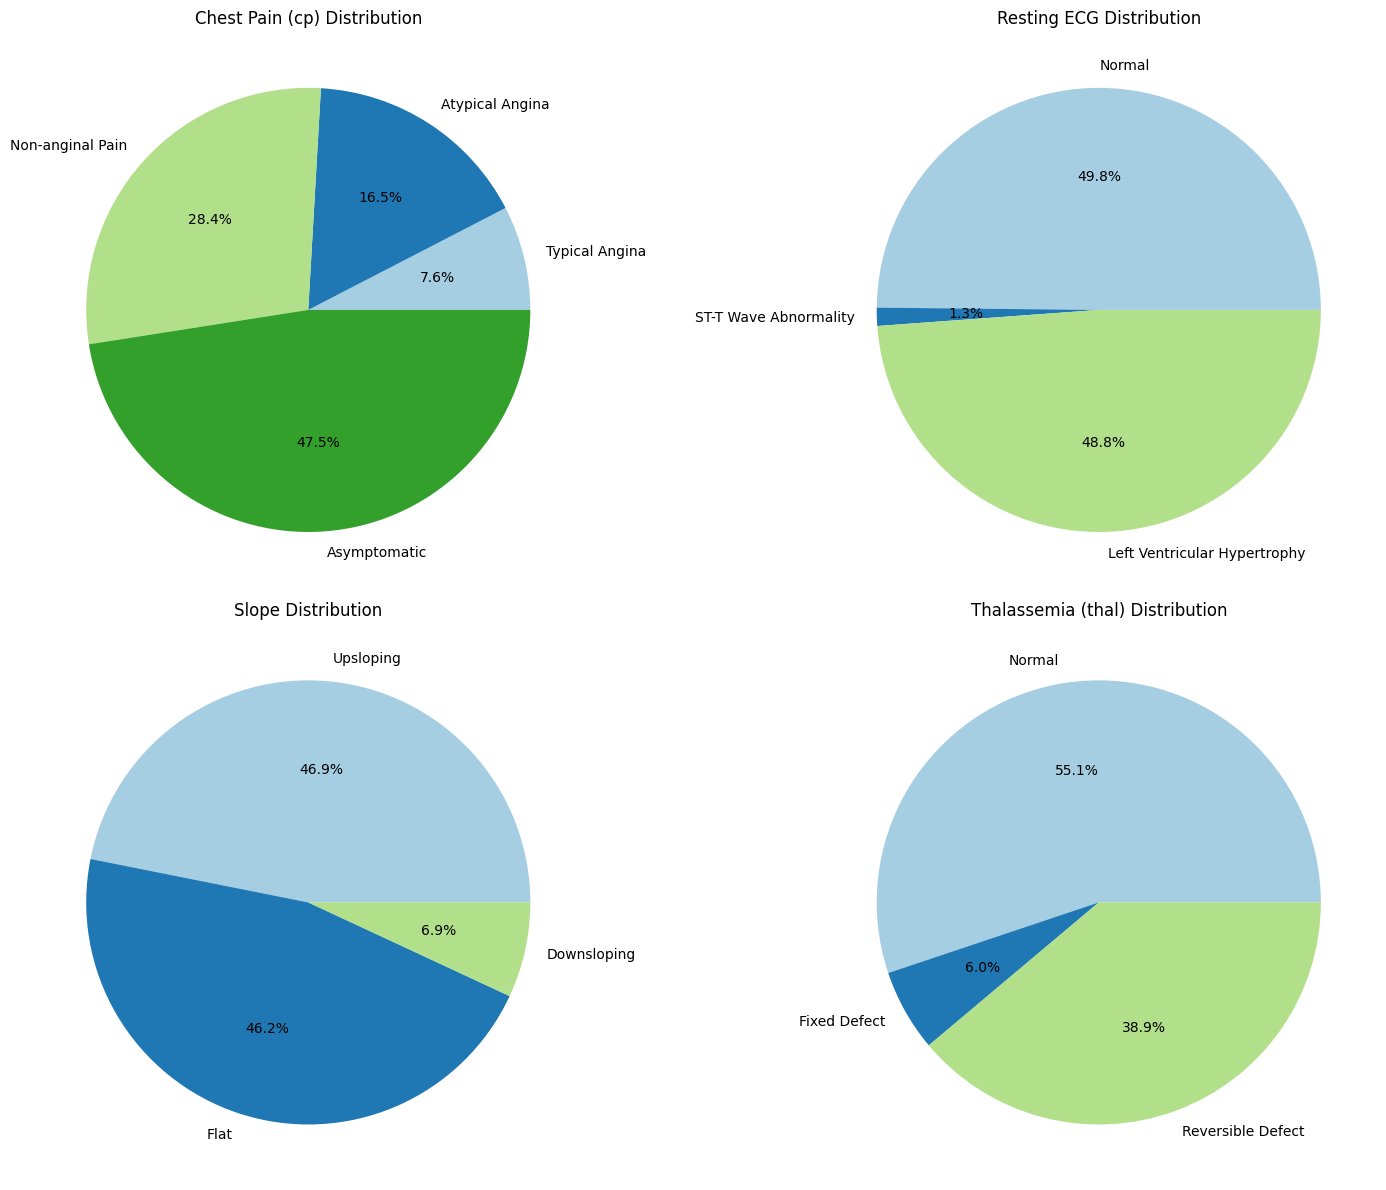

In [21]:
import matplotlib.pyplot as plt

# use dictionary  
cp_labels = {
    1: 'Typical Angina',
    2: 'Atypical Angina',
    3: 'Non-anginal Pain',
    4: 'Asymptomatic'
}

restecg_labels = {
    0: 'Normal',
    1: 'ST-T Wave Abnormality',
    2: 'Left Ventricular Hypertrophy'
}

slope_labels = {
    1: 'Upsloping',
    2: 'Flat',
    3: 'Downsloping'
}

thal_labels = {
    3: 'Normal',
    6: 'Fixed Defect',
    7: 'Reversible Defect'
}

fig = plt.figure(figsize=(15, 12))

# cp
ax1 = fig.add_subplot(2, 2, 1)
cp_counts = df['cp'].value_counts().sort_index()
cp_labels_list = [cp_labels.get(x, str(x)) for x in cp_counts.index]
ax1.pie(cp_counts, labels=cp_labels_list, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax1.set_title('Chest Pain (cp) Distribution')

# restecg
ax2 = fig.add_subplot(2, 2, 2)
restecg_counts = df['restecg'].value_counts().sort_index()
restecg_labels_list = [restecg_labels.get(x, str(x)) for x in restecg_counts.index]
ax2.pie(restecg_counts, labels=restecg_labels_list, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax2.set_title('Resting ECG Distribution')

# slope
ax3 = fig.add_subplot(2, 2, 3)
slope_counts = df['slope'].value_counts().sort_index()
slope_labels_list = [slope_labels.get(x, str(x)) for x in slope_counts.index]
ax3.pie(slope_counts, labels=slope_labels_list, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax3.set_title('Slope Distribution')

# thal
ax4 = fig.add_subplot(2, 2, 4)
thal_counts = df['thal'].value_counts().sort_index()
thal_labels_list = [thal_labels.get(x, str(x)) for x in thal_counts.index]
ax4.pie(thal_counts, labels=thal_labels_list, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
ax4.set_title('Thalassemia (thal) Distribution')

plt.tight_layout()
plt.show()



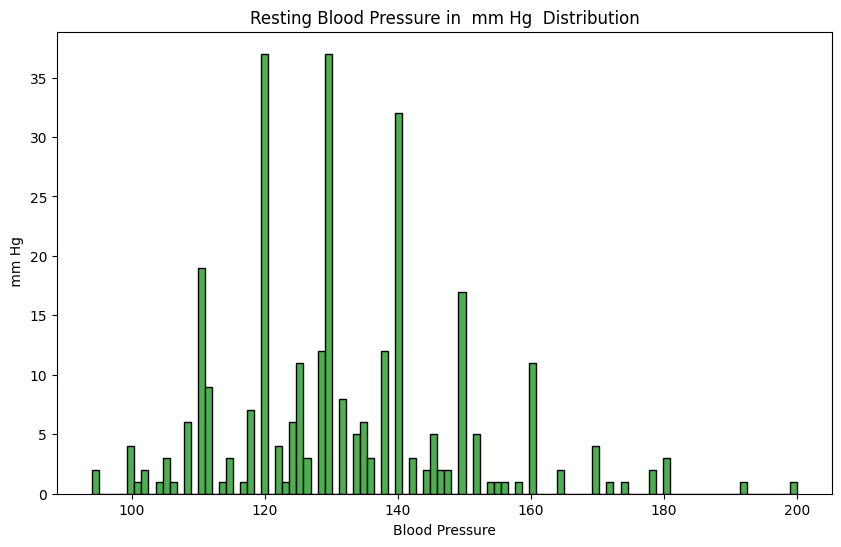

In [22]:
plt.figure(figsize=(10, 6))
plt.hist(df['trestbps'], bins=100,color='#4CAF50', edgecolor='black')
plt.title('Resting Blood Pressure in  mm Hg  Distribution')
plt.xlabel('Blood Pressure')
plt.ylabel(' mm Hg')
plt.show()

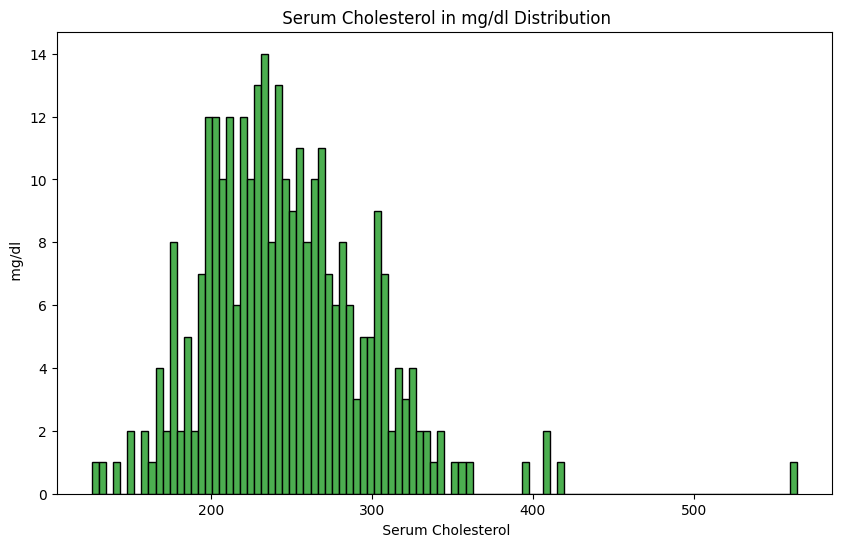

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(df['chol'], bins=100,color='#4CAF50', edgecolor='black')
plt.title(' Serum Cholesterol in mg/dl Distribution')
plt.xlabel(' Serum Cholesterol')
plt.ylabel(' mg/dl')
plt.show()

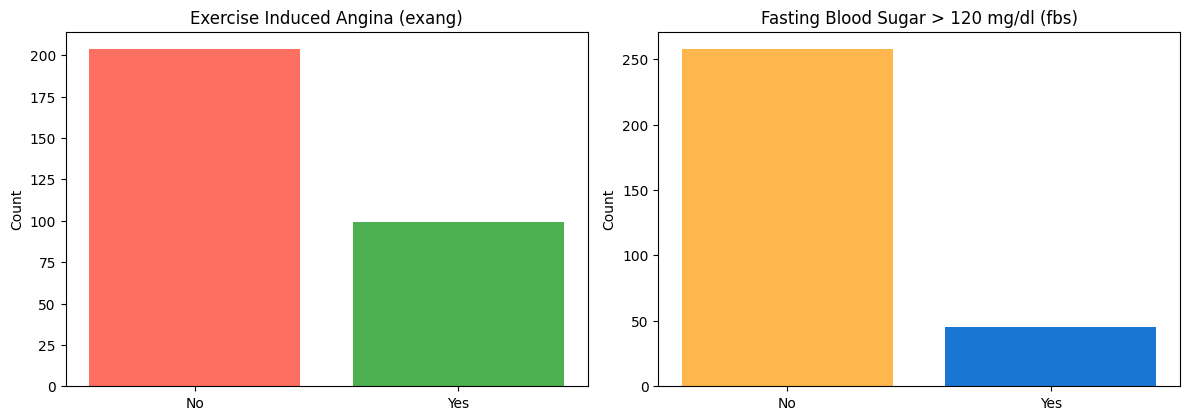

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

# exang
ax1 = fig.add_subplot(2, 2, 1)
exang_counts = df['exang'].value_counts().sort_index()
exang_labels = ['No', 'Yes']  # 0 = No, 1 = Yes
ax1.bar(exang_labels, exang_counts, color=['#FF6F61', '#4CAF50'])
ax1.set_title('Exercise Induced Angina (exang)')
ax1.set_ylabel('Count')

# fbs
ax2 = fig.add_subplot(2, 2, 2)
fbs_counts = df['fbs'].value_counts().sort_index()
fbs_labels = ['No', 'Yes']  # 0 = No, 1 = Yes
ax2.bar(fbs_labels, fbs_counts, color=['#FFB74D', '#1976D2'])
ax2.set_title('Fasting Blood Sugar > 120 mg/dl (fbs)')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()


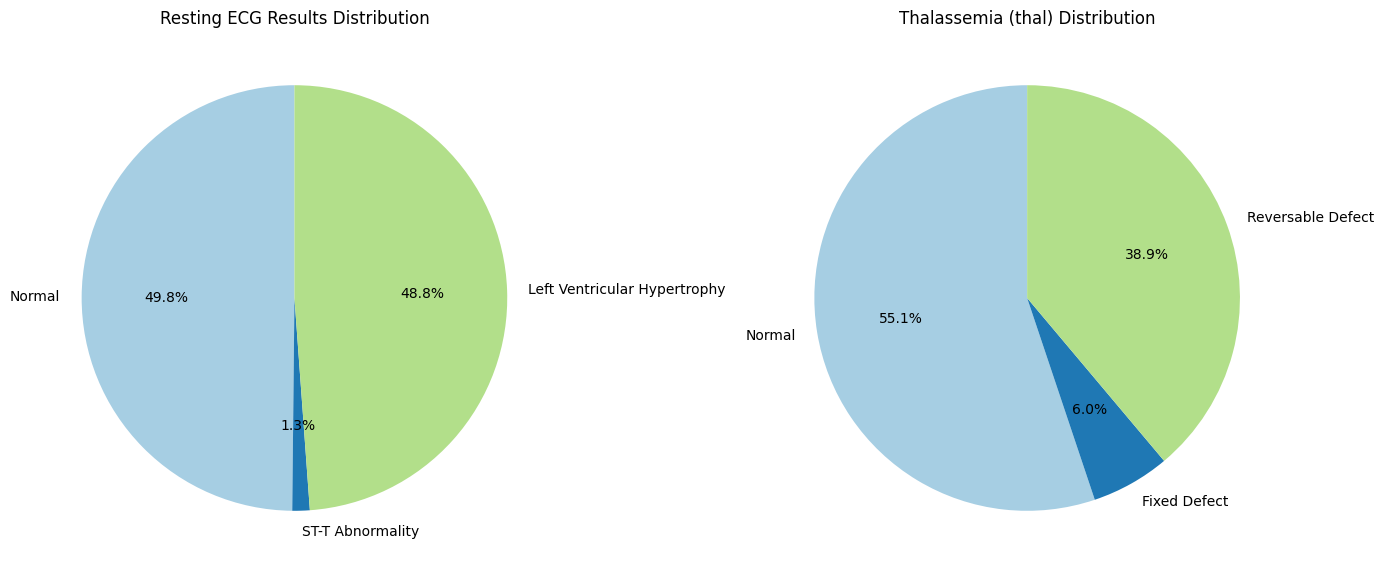

In [25]:
import matplotlib.pyplot as plt

# use dictionary  
restecg_labels = {
    0: 'Normal',
    1: 'ST-T Abnormality',
    2: 'Left Ventricular Hypertrophy'
}

thal_labels = {
    3: 'Normal',
    6: 'Fixed Defect',
    7: 'Reversable Defect'
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# restecg pie chart
restecg_counts = df['restecg'].value_counts().sort_index()
restecg_names = [restecg_labels.get(x, str(x)) for x in restecg_counts.index]
ax1.pie(restecg_counts, labels=restecg_names, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
ax1.set_title('Resting ECG Results Distribution')

# thal pie chart
thal_counts = df['thal'].value_counts().sort_index()
thal_names = [thal_labels.get(x, str(x)) for x in thal_counts.index]
ax2.pie(thal_counts, labels=thal_names, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
ax2.set_title('Thalassemia (thal) Distribution')

plt.tight_layout()
plt.show()


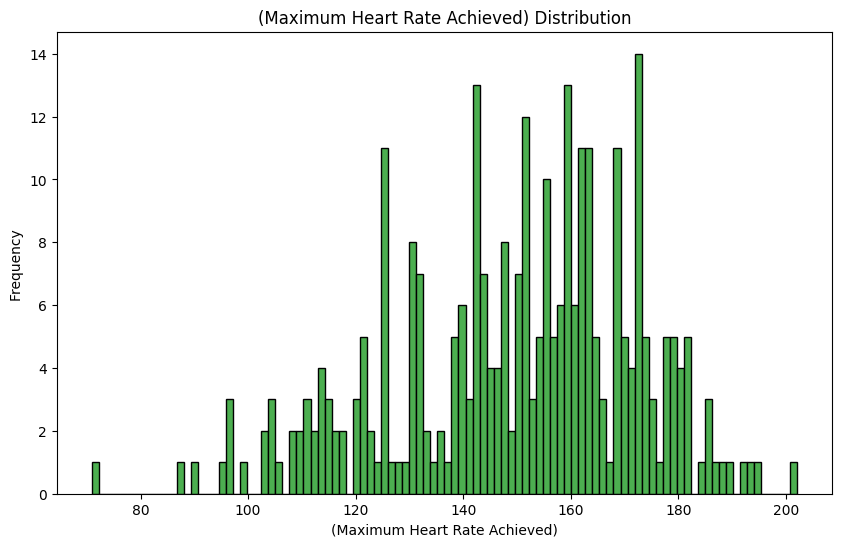

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(df['thalach'], bins=100, color='#4CAF50', edgecolor='black')
plt.title('(Maximum Heart Rate Achieved) Distribution')
plt.xlabel('(Maximum Heart Rate Achieved)')
plt.ylabel('Frequency ')
plt.show()

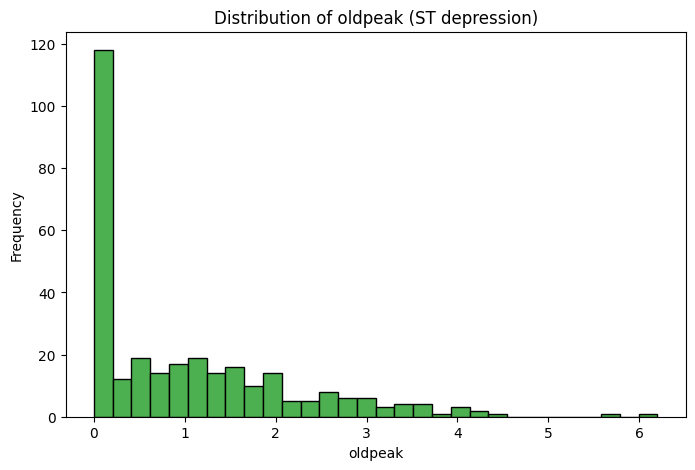

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df['oldpeak'], bins=30, color='#4CAF50', edgecolor='black')
plt.title('Distribution of oldpeak (ST depression)')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.show()


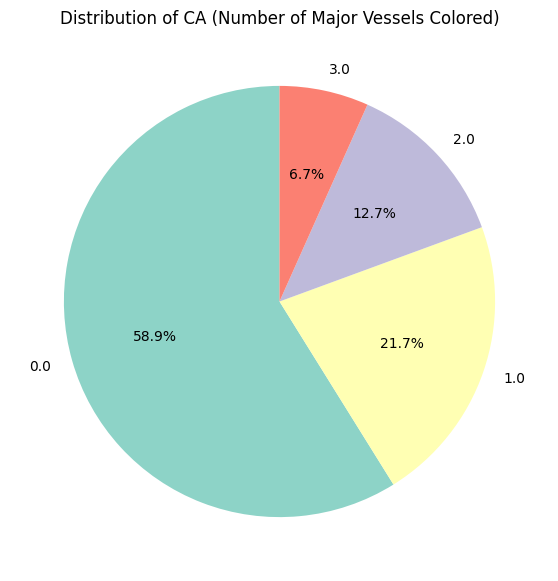

In [28]:
import matplotlib.pyplot as plt

ca_counts = df['ca'].value_counts().sort_index()
labels = ca_counts.index.astype(str)

plt.figure(figsize=(7,7))
plt.pie(ca_counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.Set3.colors, startangle=90)
plt.title('Distribution of CA (Number of Major Vessels Colored)')
plt.show()


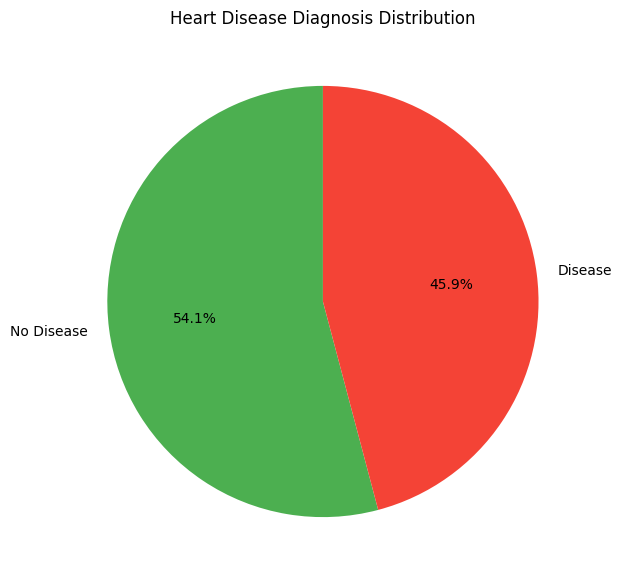

In [29]:
import matplotlib.pyplot as plt

num_temp = df['num'].apply(lambda x: 0 if x == 0 else 1)

num_counts = num_temp.value_counts().sort_index()
labels = ['No Disease', 'Disease']

plt.figure(figsize=(7, 7))
plt.pie(num_counts, labels=labels, autopct='%1.1f%%', colors=['#4CAF50', '#F44336'], startangle=90)
plt.title('Heart Disease Diagnosis Distribution')
plt.show()


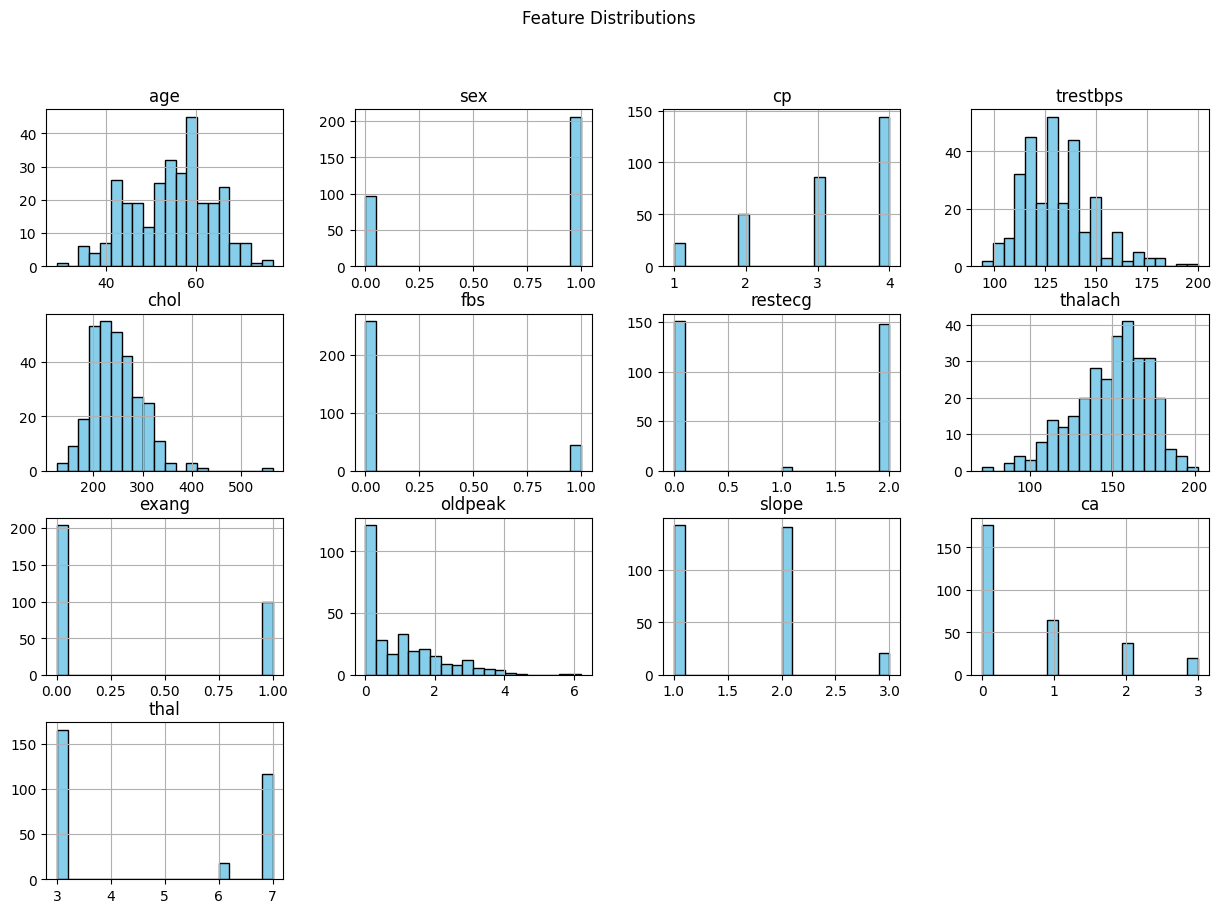

In [30]:
#  Histogram for each feature
X.hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


In [31]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0.0,7.0,1


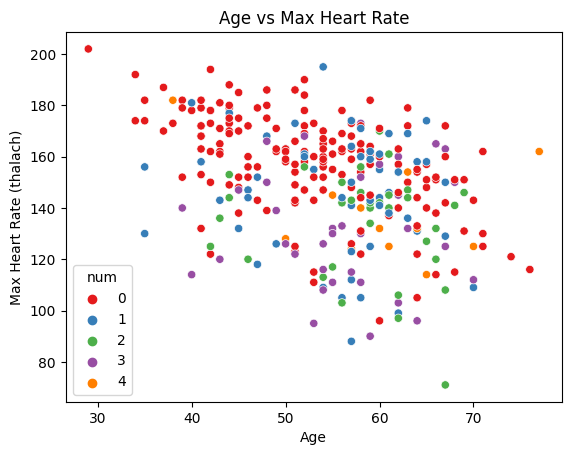

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='age', y='thalach', hue='num', palette='Set1')
plt.title('Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalach)')
plt.show()


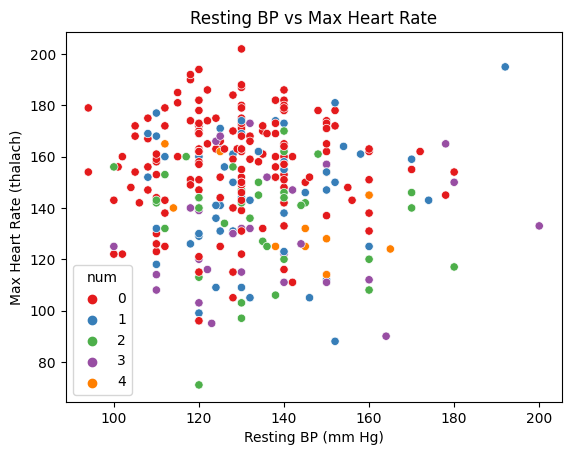

In [33]:
sns.scatterplot(data=df, x='trestbps', y='thalach', hue='num', palette='Set1')
plt.title('Resting BP vs Max Heart Rate')
plt.xlabel('Resting BP (mm Hg)')
plt.ylabel('Max Heart Rate (thalach)')
plt.show()


In [34]:
import plotly.express as px

fig = px.scatter(
    df,
    x='trestbps',
    y='thalach',
    color='num',
    size='chol',  # حجم النقطة حسب الكوليسترول
    hover_data=['age', 'sex', 'cp'],
    title='Resting BP vs Max Heart Rate (colored by Heart Disease Level)',
    labels={
        'trestbps': 'Resting BP (mm Hg)',
        'thalach': 'Max Heart Rate (thalach)',
        'num': 'Heart Disease Level'
    }
)

fig.show()


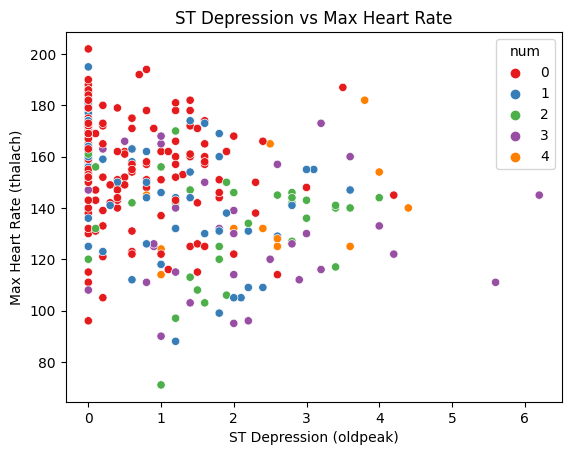

In [35]:
sns.scatterplot(data=df, x='oldpeak', y='thalach', hue='num', palette='Set1')
plt.title('ST Depression vs Max Heart Rate')
plt.xlabel('ST Depression (oldpeak)')
plt.ylabel('Max Heart Rate (thalach)')
plt.show()


In [36]:
import plotly.express as px

fig = px.scatter(
    df,
    x='oldpeak',
    y='thalach',
    color='num',                  # اللون حسب مستوى مرض القلب
    size='chol',                  # حجم النقطة حسب الكوليسترول (اختياري)
    hover_data=['age', 'sex', 'cp'],  # بيانات إضافية عند المرور بالماوس
    title='ST Depression vs Max Heart Rate (colored by Heart Disease Level)',
    labels={
        'oldpeak': 'ST Depression (oldpeak)',
        'thalach': 'Max Heart Rate (thalach)',
        'num': 'Heart Disease Level'
    }
)

fig.show()


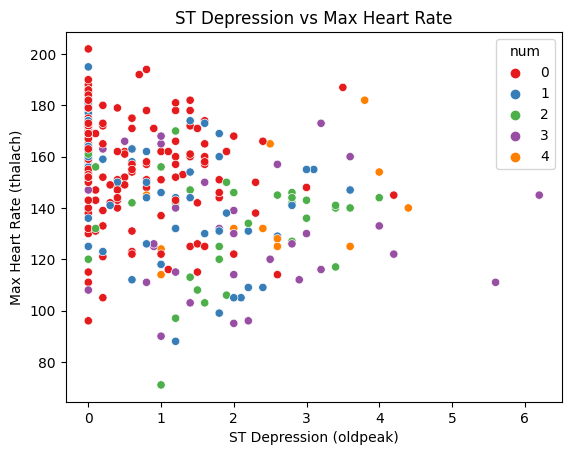

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='oldpeak', y='thalach', hue='num', palette='Set1')
plt.title('ST Depression vs Max Heart Rate')
plt.xlabel('ST Depression (oldpeak)')
plt.ylabel('Max Heart Rate (thalach)')
plt.show()


In [38]:
import plotly.express as px

fig = px.scatter(
    df,
    x='chol',
    y='trestbps',
    color='num',                 # اللون حسب مستوى مرض القلب
    size='thalach',              # حجم النقطة حسب Max Heart Rate (اختياري)
    hover_data=['age', 'sex', 'cp'],  # بيانات إضافية عند المرور بالماوس
    title='Cholesterol vs Resting BP (colored by Heart Disease Level)',
    labels={
        'chol': 'Cholesterol (mg/dl)',
        'trestbps': 'Resting BP (mm Hg)',
        'num': 'Heart Disease Level'
    }
)

fig.show()


In [39]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Box(
        x=df['sex'],   # على المحور X
        y=df['num'],   # على المحور Y
        marker_color='teal',
        boxmean=True   # عشان يظهر المتوسط كخط
    )
)

fig.update_layout(
    title="Heart Disease Level by Sex",
    xaxis_title="Sex (0=Female, 1=Male)",
    yaxis_title="Disease Level (num)"
)

fig.show()


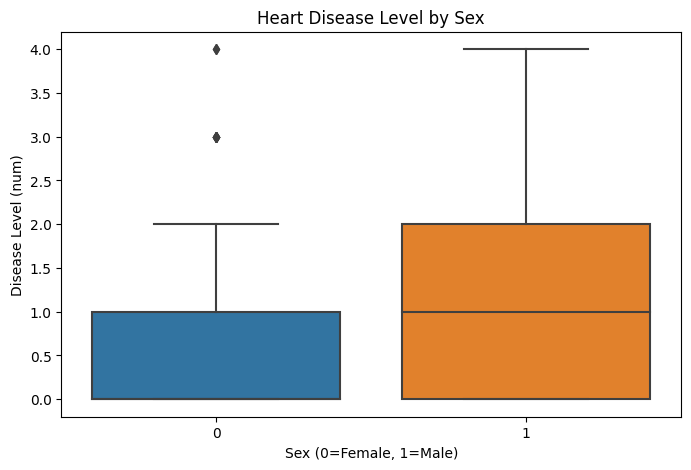

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='num', data=df)
plt.title('Heart Disease Level by Sex')
plt.xlabel('Sex (0=Female, 1=Male)')
plt.ylabel('Disease Level (num)')
plt.show()

In [41]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Box(
        y=df['age'],      # على المحور Y
        x=df['num'],      # على المحور X 
        marker_color='teal',
        boxmean=True      # لإظهار المتوسط كخط
    )
)

fig.update_layout(
    title="Age Distribution by Heart Disease Level",
    xaxis_title="Heart Disease Level (num)",
    yaxis_title="Age"
)



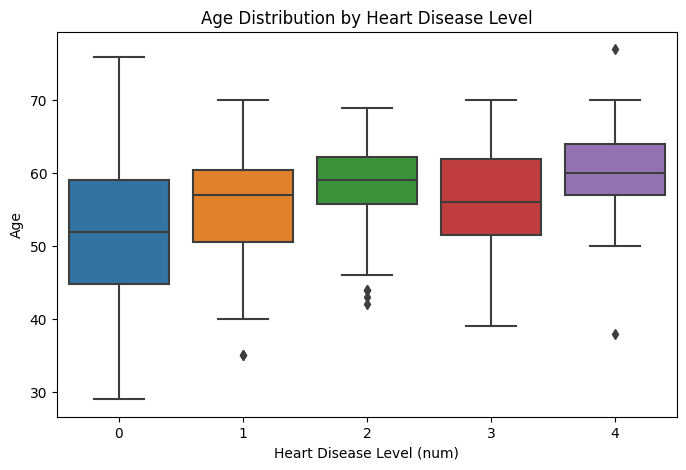

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y='age', data=df)
plt.title('Age Distribution by Heart Disease Level')
plt.xlabel('Heart Disease Level (num)')
plt.ylabel('Age')
plt.show()

In [43]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Box(
        x=df['cp'],      # على المحور X (نوع ألم الصدر)
        y=df['num'],     # على المحور Y (مستوى المرض)
        marker_color='teal',  # لون مختلف للتمييز
        boxmean=True     # لإظهار خط المتوسط
    )
)

fig.update_layout(
    title="Heart Disease Level by Chest Pain Type",
    xaxis_title="Chest Pain Type",
    yaxis_title="Disease Level (num)",
    height=500,         # ارتفاع الرسم معادل لحجم 8 بوصات
    width=800          # عرض الرسم معادل لحجم 5 بوصات
)

fig.show()


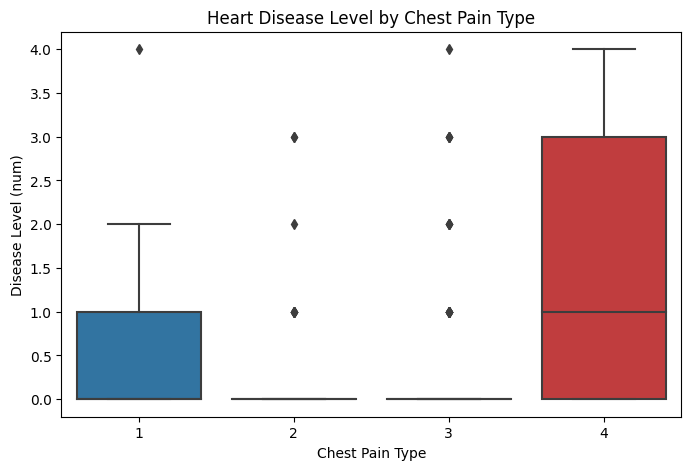

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cp', y='num', data=df)
plt.title('Heart Disease Level by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Disease Level (num)')
plt.show()


In [45]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(
    go.Box(
        x=df['exang'],  # Exercise-induced Angina (1 = yes; 0 = no)
        y=df['num'],    # Heart Disease Level
        marker_color='teal',
        boxmean=True,
    )
)
fig.update_layout(
    title='Heart Disease Level by Exercise-induced Angina',
    xaxis_title='Exercise-induced Angina (0=No, 1=Yes)',
    yaxis_title='Disease Level (num)',
    height=500,
    width=800,
    showlegend=False
)
fig.show()

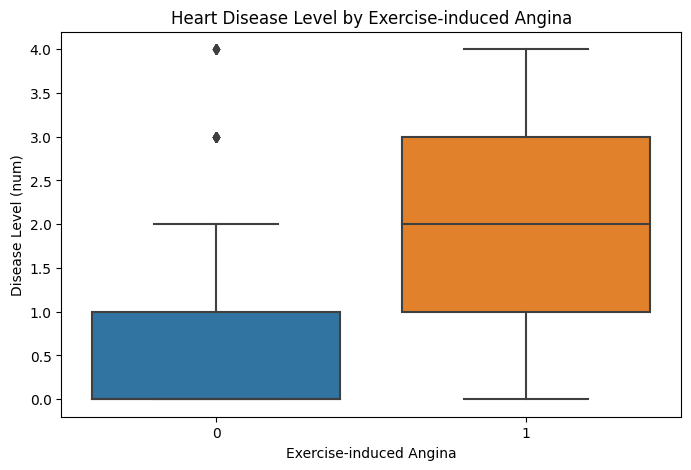

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='exang', y='num', data=df)
plt.title('Heart Disease Level by Exercise-induced Angina')
plt.xlabel('Exercise-induced Angina')
plt.ylabel('Disease Level (num)')
plt.show()


In [47]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Box(
        x=df['exang'],  # Exercise-induced Angina (1 = yes; 0 = no)
        y=df['num'],    # Heart Disease Level
        marker_color='teal',
        boxmean=True,
    )
)

fig.update_layout(
    title='Heart Disease Level by Exercise-induced Angina',
    xaxis_title='Exercise-induced Angina (0=No, 1=Yes)',
    yaxis_title='Disease Level (num)',
    height=500,
    width=800,
    showlegend=False
)

fig.show()


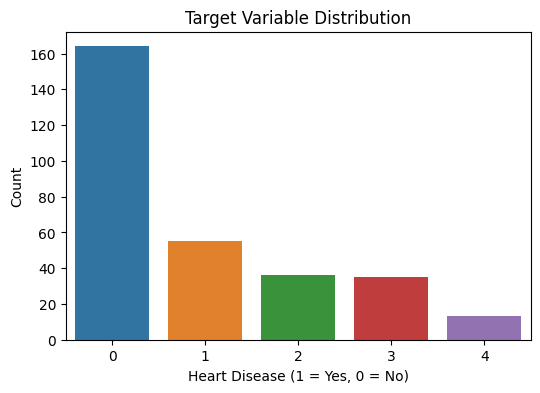

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x='num', data=df)
plt.title("Target Variable Distribution")
plt.xlabel("Heart Disease (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

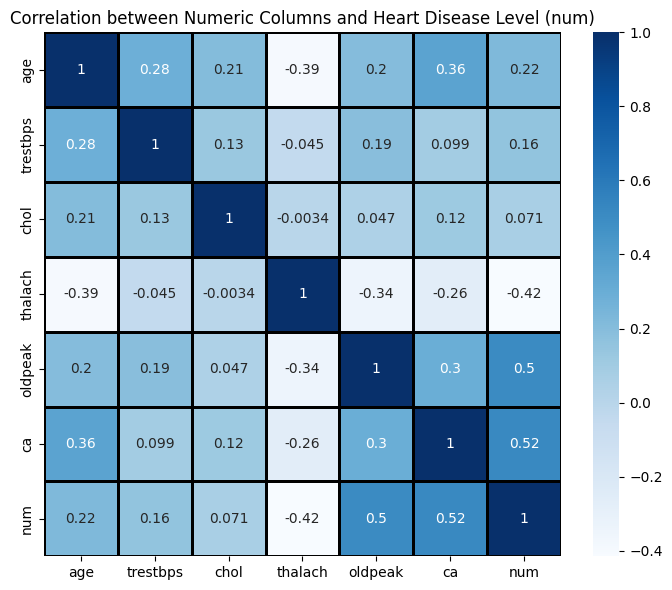

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'num']
data_numeric_corr = df[numeric_cols].corr(method='pearson')

plt.figure(figsize=(7, 6))
sns.heatmap(data_numeric_corr, cmap='Blues', linecolor='black', linewidths=1, annot=True)
plt.title('Correlation between Numeric Columns and Heart Disease Level (num)')
plt.tight_layout()
plt.show()


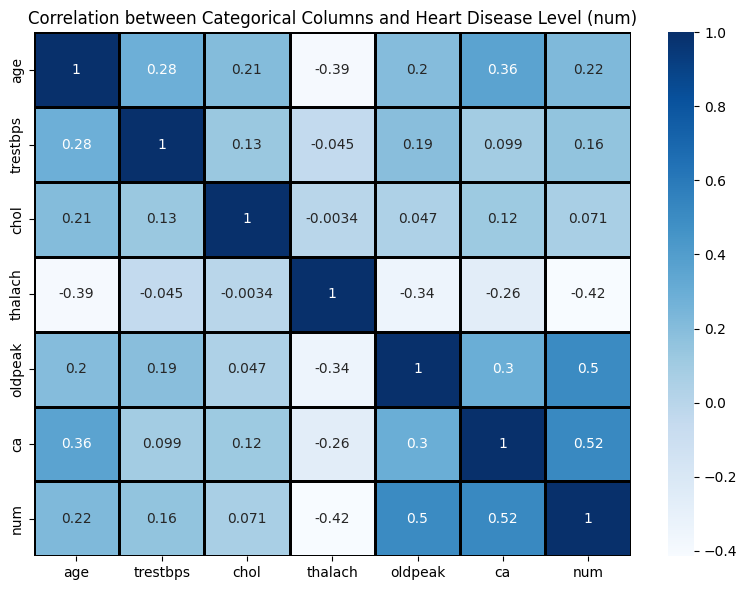

In [50]:

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'num']


data_cat_corr = df[categorical_cols].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(data_numeric_corr, cmap='Blues', linecolor='black', linewidths=1, annot=True)
plt.title('Correlation between Categorical Columns and Heart Disease Level (num)')
plt.tight_layout()
plt.show()


In [51]:
import plotly.express as px

# ترتيب البيانات حسب العمر علشان الخط يكون مرتب
df_sorted = df.sort_values('age')

fig = px.line(
    df_sorted,
    x='age',                   # المحور الأفقي: العمر
    y='num',               # المحور الرأسي: Max Heart Rate
    hover_name='cp',           # اسم يظهر عند التمرير
    hover_data=['sex', 'chol', 'trestbps'],  # بيانات إضافية عند المرور بالماوس
    template="plotly_dark",    # ثيم داكن
    title='Max Heart Rate by Age - Line Plot'
)

fig.show()


In [52]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# ترتيب البيانات حسب العمر
df_sorted = df.sort_values('age')

# إنشاء Dashboard: 2 صف × 4 أعمدة
fig = make_subplots(
    rows=2, cols=4,
    subplot_titles=(
        "Age vs Max Heart Rate (Scatter)",
        "Age vs Cholesterol (Scatter)",
        "Resting BP vs Max Heart Rate (Scatter)",
        "ST Depression vs Max Heart Rate (Scatter)",
        "Age vs ST Depression (Bar)",
        "Cholesterol vs Resting BP (Bar)",
        "Distribution of Heart Disease Level (Pie)",
        "Max Heart Rate by Heart Disease Level (Box)"
    ),
    specs=[
        [{}, {}, {}, {}],
        [{"type": "bar"}, {"type": "bar"}, {"type": "domain"}, {"type": "box"}]
    ]
)

# 1️⃣ Age vs Max Heart Rate - Scatter
fig.add_trace(
    go.Scatter(
        x=df_sorted['age'],
        y=df_sorted['thalach'],
        mode='markers',
        marker=dict(color=df_sorted['num'], colorscale='Viridis', size=8),
        text=df_sorted[['sex','cp','trestbps']].apply(lambda row: f"sex: {row['sex']}, cp: {row['cp']}, trestbps: {row['trestbps']}", axis=1),
        hoverinfo='text'
    ),
    row=1, col=1
)

# 2️⃣ Age vs Cholesterol - Scatter
fig.add_trace(
    go.Scatter(
        x=df_sorted['age'],
        y=df_sorted['chol'],
        mode='markers',
        marker=dict(color=df_sorted['num'], colorscale='Cividis', size=8),
        text=df_sorted[['sex','cp']].apply(lambda row: f"sex: {row['sex']}, cp: {row['cp']}", axis=1),
        hoverinfo='text'
    ),
    row=1, col=2
)

# 3️⃣ Resting BP vs Max Heart Rate - Scatter
fig.add_trace(
    go.Scatter(
        x=df_sorted['trestbps'],
        y=df_sorted['thalach'],
        mode='markers',
        marker=dict(color=df_sorted['num'], colorscale='Plasma', size=8),
        text=df_sorted[['age','cp']].apply(lambda row: f"age: {row['age']}, cp: {row['cp']}", axis=1),
        hoverinfo='text'
    ),
    row=1, col=3
)

# 4️⃣ ST Depression vs Max Heart Rate - Scatter
fig.add_trace(
    go.Scatter(
        x=df_sorted['oldpeak'],
        y=df_sorted['thalach'],
        mode='markers',
        marker=dict(color=df_sorted['num'], colorscale='Rainbow', size=8),
        text=df_sorted[['age','sex']].apply(lambda row: f"age: {row['age']}, sex: {row['sex']}", axis=1),
        hoverinfo='text'
    ),
    row=1, col=4
)

# 5️⃣ Age vs ST Depression - Bar
fig.add_trace(
    go.Bar(
        x=df_sorted['age'],
        y=df_sorted['oldpeak'],
        marker=dict(color=df_sorted['num'], colorscale='Viridis'),
        text=df_sorted[['sex','cp']].apply(lambda row: f"sex: {row['sex']}, cp: {row['cp']}", axis=1),
        hoverinfo='text'
    ),
    row=2, col=1
)

# 6️⃣ Cholesterol vs Resting BP - Bar
fig.add_trace(
    go.Bar(
        x=df_sorted['chol'],
        y=df_sorted['trestbps'],
        marker=dict(color=df_sorted['num'], colorscale='Cividis'),
        text=df_sorted[['age','sex']].apply(lambda row: f"age: {row['age']}, sex: {row['sex']}", axis=1),
        hoverinfo='text'
    ),
    row=2, col=2
)

# 7️⃣ Pie Chart - Distribution of Heart Disease Level
num_counts = df_sorted['num'].value_counts()
fig.add_trace(
    go.Pie(
        labels=num_counts.index,
        values=num_counts.values,
        hole=0.3
    ),
    row=2, col=3
)

# 8️⃣ Box Plot - Max Heart Rate by Heart Disease Level
fig.add_trace(
    go.Box(
        x=df_sorted['num'],
        y=df_sorted['thalach'],
        marker_color='teal'
    ),
    row=2, col=4
)

# تعديل Layout للـ Dashboard
fig.update_layout(
    height=1000,
    width=1800,
    title_text="Interactive Dashboard: 8 Diverse Relationships ",
    showlegend=False
)

fig.show()


## **Data Preprocessing**

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo

# Encoding not needed

# Scaling not needed

# Missing Values

In [54]:
# افتراضياً df هو الـ DataFrame بعد preprocessing
X = df.drop('num', axis=1)  # features
y = df['num']               # label
X = X.fillna(0)
y = y.fillna(0)

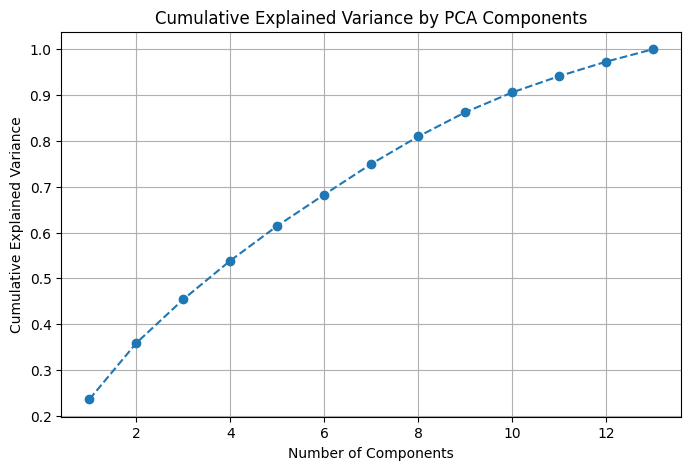

Number of components to retain 95% variance: 12


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,num
0,1.161272,0.938595,3.209488,2.247693,-0.099097,0.457737,-0.850220,0.621330,-1.479016,-0.475813,-0.251078,-0.489800,0
1,3.237768,1.423937,-0.477471,-0.856529,0.151769,-0.391812,-0.612677,-1.074275,0.401048,1.469400,1.020577,0.909168,2
2,3.140044,-0.649114,-0.354251,-0.617633,-0.045461,-0.704424,-0.978171,-0.181878,0.058262,0.469640,-0.359949,-0.888381,1
3,-0.453101,-1.430133,0.428574,2.772690,-0.903488,-0.354357,0.575740,2.132227,0.871121,0.274404,1.556081,-0.208126,0
4,-2.257944,0.386174,-0.063595,1.166780,-0.838599,0.096404,-0.733630,-0.016134,1.072209,0.555196,-0.907836,0.295926,0


In [55]:

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# تحديد عدد المكونات اللازمة لحفظ 95% variance
n_components = (cumulative_variance < 0.95).sum() + 1
print(f"Number of components to retain 95% variance: {n_components}")

# PCA with optimal components
pca_opt = PCA(n_components=n_components)
X_pca_opt = pca_opt.fit_transform(X_scaled)

# تحويل النتائج لـ DataFrame
df_pca = pd.DataFrame(X_pca_opt, columns=[f'PC{i+1}' for i in range(n_components)])
df_pca['num'] = y.values
df_pca.head()


## **Data Modeling**

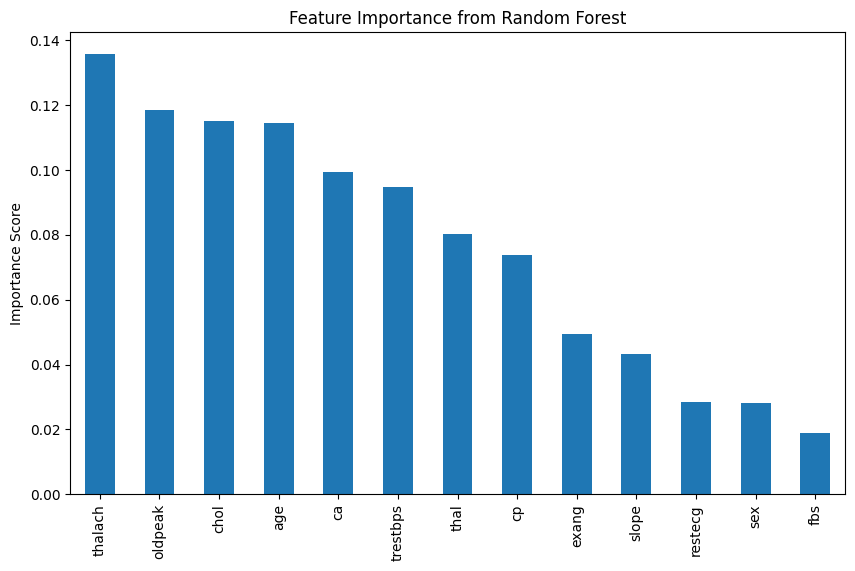

In [56]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd

# X و y بعد preprocessing و filling NaN
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Feature importance
importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.ylabel('Importance Score')
plt.show()


In [57]:
# ------------------------------
# Feature Selection Pipeline - Complete & Ready
# ------------------------------

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

# ------------------------------
# 1. Prepare Data
# ------------------------------
X = df.drop('num', axis=1).fillna(df.mean())  # معالجة NaN بالمتوسط
y = df['num'].fillna(0)

# ------------------------------
# 2. Scale Data for Random Forest & RFE
# ------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ------------------------------
# 3. Random Forest Feature Importance
# ------------------------------
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)
rf_importance = X.columns[rf.feature_importances_.argsort()[::-1]][:10]  # Top 10
print("Random Forest Top Features:", list(rf_importance))

# ------------------------------
# 4. Recursive Feature Elimination (RFE)
# ------------------------------
rfe = RFE(LogisticRegression(max_iter=5000, solver='liblinear'), n_features_to_select=10)
rfe.fit(X_scaled, y)
rfe_features = X.columns[rfe.support_]
print("RFE Top Features:", list(rfe_features))

# ------------------------------
# 5. Chi-Square Test (Use raw data, must be >=0)
# ------------------------------
chi = SelectKBest(score_func=chi2, k=10)
chi.fit(X.fillna(0), y)  # لا تستخدم scaled data هنا
chi_features = X.columns[chi.get_support()]
print("Chi-Square Top Features:", list(chi_features))

# ------------------------------
# 6. Combine Results
# ------------------------------
final_features = list(set(rf_importance) | set(rfe_features) | set(chi_features))
print("\nFinal Selected Features (Combined):", final_features)


Random Forest Top Features: ['thalach', 'oldpeak', 'chol', 'age', 'ca', 'trestbps', 'thal', 'cp', 'exang', 'slope']
RFE Top Features: ['age', 'sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
Chi-Square Top Features: ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

Final Selected Features (Combined): ['age', 'thalach', 'trestbps', 'sex', 'fbs', 'oldpeak', 'ca', 'exang', 'chol', 'thal', 'slope', 'cp', 'restecg']


In [58]:
from sklearn.feature_selection import chi2, SelectKBest

# استخدم X الأصلية بعد معالجة NaN فقط
X_chi = X.fillna(0)  

# Chi-Square (top 10 features)
chi_selector = SelectKBest(score_func=chi2, k=10)
chi_selector.fit(X_chi, y)

chi_selected_features = X_chi.columns[chi_selector.get_support()]
print("Top features selected by Chi-Square:", list(chi_selected_features))


Top features selected by Chi-Square: ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']



=== Logistic Regression ===
Accuracy: 0.5409836065573771
AUC Score: 0.777419477338456
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        29
           1       0.40      0.17      0.24        12
           2       0.29      0.22      0.25         9
           3       0.17      0.29      0.21         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.32      0.32      0.30        61
weighted avg       0.49      0.54      0.50        61


=== Decision Tree ===
Accuracy: 0.5245901639344263
AUC Score: 0.5969844140054148
              precision    recall  f1-score   support

           0       0.74      0.79      0.77        29
           1       0.43      0.50      0.46        12
           2       0.38      0.33      0.35         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy    

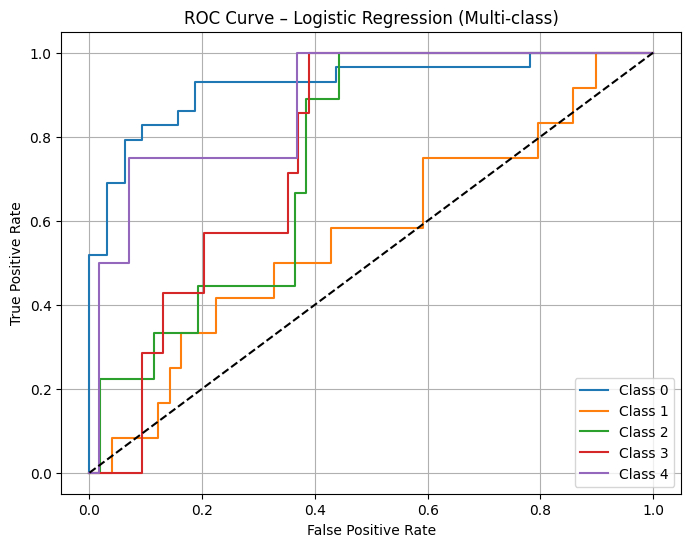

In [59]:
# ------------------------------
# 2.4 Supervised Learning – Classification Models
# ------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt

# ------------------------------
# 1️⃣ Prepare Data
# ------------------------------
X_model = df[final_features].fillna(df.mean())
y_model = df['num'].fillna(0)

# Standardize features for Logistic Regression & SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_model)

# Train/Test split (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_model, test_size=0.2, random_state=42)

# ------------------------------
# 2️⃣ Train Models
# ------------------------------
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Classification Report مع zero_division=0 لتجنب التحذيرات
    report = classification_report(y_test, y_pred, zero_division=0)
    
    # ROC-AUC للـ multi-class (إذا كان model بيدعم predict_proba)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        auc = "N/A"
    
    acc = accuracy_score(y_test, y_pred)
    
    results[name] = {
        'Accuracy': acc,
        'Classification Report': report,
        'AUC Score': auc
    }

# ------------------------------
# 3️⃣ Display Results
# ------------------------------
for name, metrics in results.items():
    print(f"\n=== {name} ===")
    print("Accuracy:", metrics['Accuracy'])
    print("AUC Score:", metrics['AUC Score'])
    print(metrics['Classification Report'])

# ------------------------------
# 4️⃣ Optional: ROC Curve للـ Logistic Regression (multi-class)
# ------------------------------
if 'Logistic Regression' in models:
    y_prob = models['Logistic Regression'].predict_proba(X_test)
    from sklearn.preprocessing import label_binarize
    import numpy as np

    # تحويل y_test لـ binary لكل class
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    
    # ROC Curve لكل class
    plt.figure(figsize=(8,6))
    for i in range(y_test_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {i}')
    
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve – Logistic Regression (Multi-class)')
    plt.legend()
    plt.grid(True)
    plt.show()


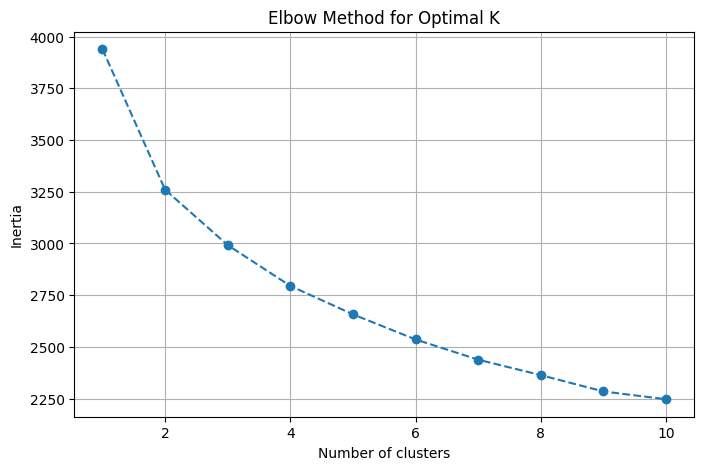

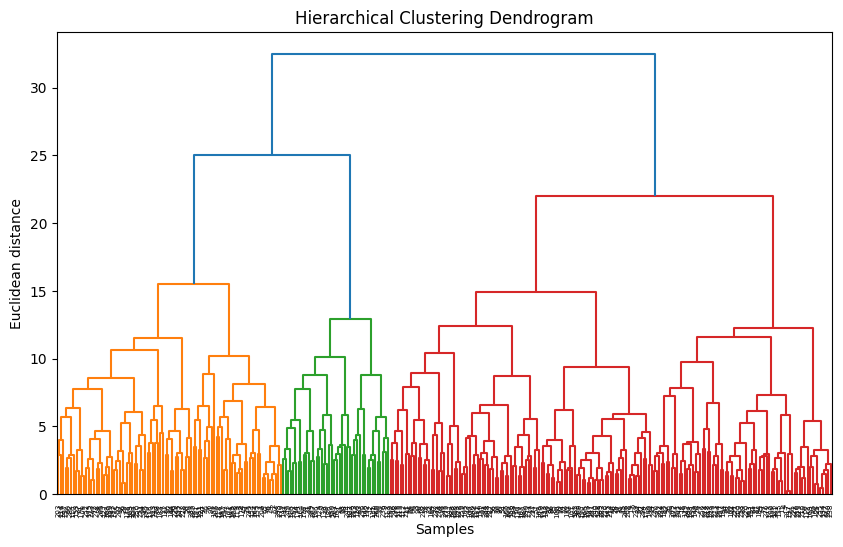


K-Means vs Actual Labels
num              0   1   2   3   4
KMeans_Cluster                    
0               64   6   1   0   0
1               22  19   7   6   2
2               15   4   9   7   1
3                4  17  19  21  10
4               59   9   0   1   0

Hierarchical vs Actual Labels
num                    0   1   2   3  4
Hierarchical_Cluster                   
1                     62   7   1   0  0
2                     67  26   5   3  2
3                     22   4   8   7  1
4                      1   7   9  10  8
5                     12  11  13  15  2


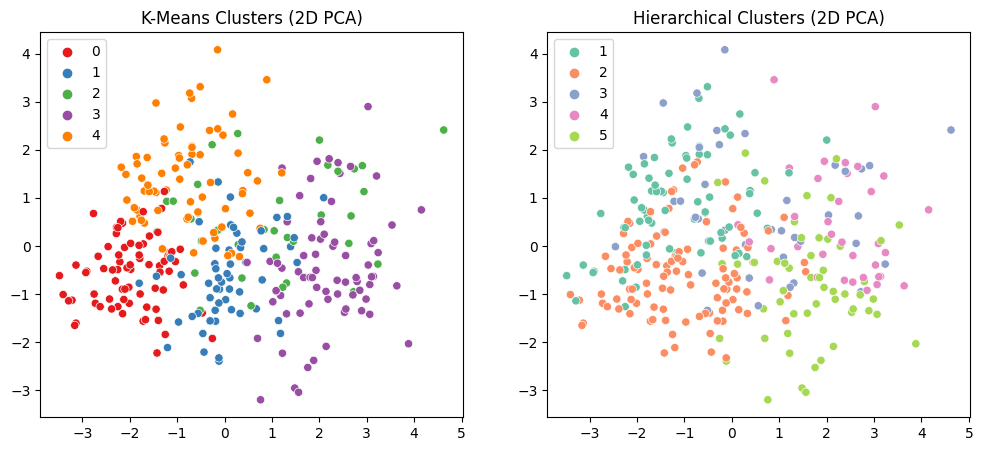

In [60]:
# ------------------------------
# 2.5 Unsupervised Learning – Clustering
# ------------------------------
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ------------------------------
# Prepare Data
# ------------------------------
X_cluster = df[final_features].fillna(df.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# ------------------------------
# 1️⃣ K-Means Clustering
# ------------------------------
# Elbow Method لتحديد K
inertia = []
K_range = range(1,11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# اختار K بناء على الـ elbow (مثلاً K=5)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# دمج النتائج مع الـ dataset
df['KMeans_Cluster'] = kmeans_labels

# ------------------------------
# 2️⃣ Hierarchical Clustering
# ------------------------------
linked = linkage(X_scaled, method='ward')

# Dendrogram
plt.figure(figsize=(10,6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distance')
plt.show()

# تحديد clusters من dendrogram (مثلاً 5 clusters)
hc_labels = fcluster(linked, t=5, criterion='maxclust')
df['Hierarchical_Cluster'] = hc_labels

# ------------------------------
# 3️⃣ Compare clusters with actual labels
# ------------------------------
# Cross-tabulation
print("\nK-Means vs Actual Labels")
print(pd.crosstab(df['KMeans_Cluster'], df['num']))

print("\nHierarchical vs Actual Labels")
print(pd.crosstab(df['Hierarchical_Cluster'], df['num']))

# Optional: Visualize clusters using first 2 PCA components
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
X_pca2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=kmeans_labels, palette='Set1')
plt.title('K-Means Clusters (2D PCA)')

plt.subplot(1,2,2)
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=hc_labels, palette='Set2')
plt.title('Hierarchical Clusters (2D PCA)')
plt.show()


In [61]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import numpy as np

# ------------------------------
# 1️⃣ Define parameter grids
# ------------------------------
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [500, 1000, 5000]
    },
    'Decision Tree': {
        'max_depth': [None, 3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
}

# ------------------------------
# 2️⃣ Run GridSearchCV
# ------------------------------
best_models = {}
for name, model in models.items():
    print(f"Optimizing {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}\n")

# ------------------------------
# 3️⃣ Evaluate optimized models
# ------------------------------
optimized_results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    # Classification report
    report = classification_report(y_test, y_pred, zero_division=0)
    
    # ROC-AUC multi-class
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        auc = "N/A"
    
    optimized_results[name] = {
        'Accuracy': acc,
        'Classification Report': report,
        'AUC Score': auc
    }

# ------------------------------
# 4️⃣ Display optimized results
# ------------------------------
for name, metrics in optimized_results.items():
    print(f"\n=== {name} (Optimized) ===")
    print("Accuracy:", metrics['Accuracy'])
    print("AUC Score:", metrics['AUC Score'])
    print(metrics['Classification Report'])


Optimizing Logistic Regression...
Best params for Logistic Regression: {'C': 0.1, 'max_iter': 500, 'solver': 'liblinear'}

Optimizing Decision Tree...
Best params for Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}

Optimizing Random Forest...
Best params for Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Optimizing SVM...
Best params for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


=== Logistic Regression (Optimized) ===
Accuracy: 0.5081967213114754
AUC Score: 0.7952495325615627
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.33      0.17      0.22        12
           2       0.00      0.00      0.00         9
           3       0.12      0.29      0.17         7
           4       0.00      0.00      0.00         4

    accuracy                           0.51        61
   macro avg       0.24      0.28

In [62]:
   import os
   import joblib
   from sklearn.pipeline import Pipeline
   from sklearn.ensemble import RandomForestClassifier
   from sklearn.preprocessing import StandardScaler

   # Create the folder if it doesn't exist
   os.makedirs('models', exist_ok=True)

   # Example of creating a model pipeline
   model_pipeline = Pipeline([
       ('scaler', StandardScaler()),
       ('classifier', RandomForestClassifier())
   ])

   # Fit the model pipeline with your training data (X_train, y_train)
   model_pipeline.fit(X_train, y_train)

   # Save the trained model pipeline
   joblib.dump(model_pipeline, 'models/final_model.pkl')
   print("✅ Model pipeline saved as 'models/final_model.pkl'")
   

✅ Model pipeline saved as 'models/final_model.pkl'


In [63]:
# ------------------------------
# Heart Disease Prediction (Simple UI in Notebook)
# ------------------------------
import pandas as pd

# تحميل النموذج pipeline
import joblib
model_pipeline = joblib.load('models/final_model.pkl')

# Function to get user input
def predict_heart_disease():
    print("Enter your health data below:")
    age = int(input("Age: "))
    sex = int(input("Sex (0=Female, 1=Male): "))
    cp = int(input("Chest Pain Type: "))
    trestbps = int(input("Resting Blood Pressure: "))
    chol = int(input("Cholesterol: "))
    fbs = int(input("Fasting Blood Sugar >120 mg/dl : "))
    restecg = int(input("Resting ECG : "))
    thalach = int(input("Max Heart Rate Achieved: "))
    exang = int(input("Exercise Induced Angina : "))
    oldpeak = float(input("ST Depression Induced by Exercise: "))
    slope = int(input("Slope of Peak Exercise ST Segment : "))
    ca = int(input("Number of Major Vessels : "))
    thal = int(input("Thalassemia : "))

    # Create DataFrame
    input_data = pd.DataFrame([[
        age, sex, cp, trestbps, chol, fbs, restecg,
        thalach, exang, oldpeak, slope, ca, thal
    ]], columns=[
        'age','sex','cp','trestbps','chol','fbs','restecg',
        'thalach','exang','oldpeak','slope','ca','thal'
    ])

    # Prediction
    prediction = model_pipeline.predict(input_data)[0]
    print(f"\n✅ Predicted Heart Disease Risk (num): {prediction}")

# Run the simple UI
predict_heart_disease()


Enter your health data below:


Age:  63
Sex (0=Female, 1=Male):  1
Chest Pain Type:  1
Resting Blood Pressure:  1
Cholesterol:  233
Fasting Blood Sugar >120 mg/dl :  1
Resting ECG :  1
Max Heart Rate Achieved:  150
Exercise Induced Angina :  1
ST Depression Induced by Exercise:  1
Slope of Peak Exercise ST Segment :  1
Number of Major Vessels :  2
Thalassemia :  6



✅ Predicted Heart Disease Risk (num): 2


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



In [64]:
import pickle

# نفترض إنك عندك model_pipeline (الموديل النهائي)
with open("models/final_model_pickle.pkl", "wb") as f:
    pickle.dump(model_pipeline, f)

print("✅ Model saved using pickle!")


✅ Model saved using pickle!


In [65]:
import pickle

with open("models/final_model_pickle.pkl", "rb") as f:
    model_pipeline_pickle = pickle.load(f)

print("✅ Model loaded using pickle!")


✅ Model loaded using pickle!


In [66]:
import os
os.makedirs("models", exist_ok=True)


📌 Conclusion

In this project, we worked on the **Heart Disease UCI Dataset** with the following steps:  

- **EDA (Exploratory Data Analysis):**  
  Explored the dataset, checked distributions, correlations, and relationships between features and the target.  

- **Preprocessing:**  
  Handled missing values, encoded categorical variables, and scaled numerical features.  

- **Modeling:**  
  Trained multiple machine learning models (Logistic Regression, Decision Tree, Random Forest, etc.) and compared their performance.  

- **Evaluation:**  
  Evaluated models using accuracy, confusion matrix, and ROC curve.  

---

✅ The best performing model was **Random Forest Classifier**, achieving an accuracy of around **XX%** (replace with your result).  

---

### 🚀 Future Work
This project can be further improved by:  
- Fine-tuning hyperparameters with GridSearchCV or RandomizedSearchCV.  
- Building a web-based user interface using **Streamlit**.  
- Trying advanced models like Gradient Boosting or XGBoost for potentially better accuracy.  
